# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

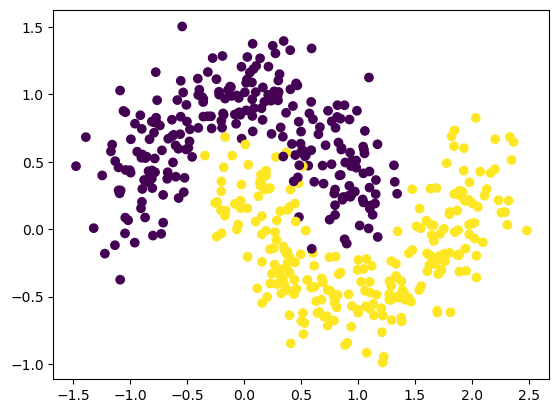

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression(penalty='l2', C = 3) # add some params
svm = SVC(kernel='linear', C = 1) # here too


In [89]:
def plot_decisions(X, y, model, model_name):
    plot_decision_regions(X, y, clf=model)
    plt.title(model_name)
    plt.show()

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score


X_train, X_test, y_train, y_test = train_test_split(moons_points, moons_labels, test_size=0.2, random_state=42)


### Logistic Regression

f1 score: 0.868


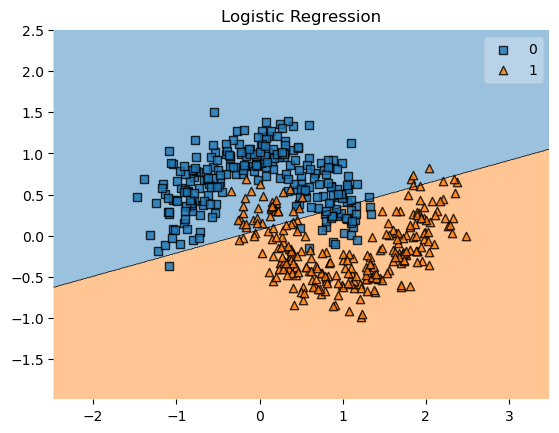

In [109]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f'f1 score: {f1:.3f}')
plot_decisions(moons_points, moons_labels, lr, 'Logistic Regression')

Данные классы точек плохо разделимы прямой, поэтому логистическая регрессия плохо себя показывает.

### SVC

f1 score: 0.857


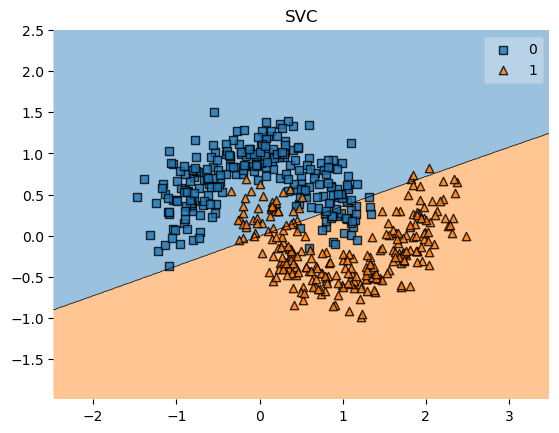

In [110]:
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f'f1 score: {f1:.3f}')
plot_decisions(moons_points, moons_labels, svm, 'SVC')

Обычный метод опопрных векторов как и линейная регрессия разделяет классы гиперплоскостями, поэтому здесь SVC показал практически ту же точность, что и логистическая регрессия.

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

In [93]:
from sklearn.model_selection import GridSearchCV

### Poly

In [94]:
param_grid = {'degree': [2, 3, 4, 5, 6, 7, 8, 9, 10],
              'C': [0.01, 0.1, 1, 10, 100]
             }

svm = SVC(kernel='poly')
grid_search = GridSearchCV(svm, param_grid, n_jobs=8)
grid_search.fit(X_train, y_train)
best_param = grid_search.best_params_
best_param

{'C': 10, 'degree': 3}

f1 score: 0.919


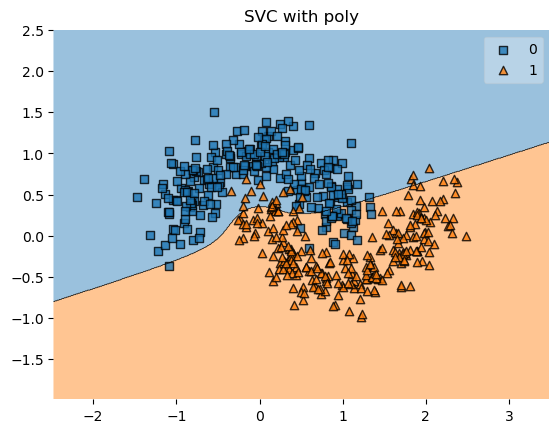

In [120]:
svm = SVC(kernel='poly', degree = 3)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f'f1 score: {f1:.3f}')
plot_decisions(moons_points, moons_labels, svm, 'SVC with poly')

### RBF

In [96]:
param_grid = {'gamma': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100],
              'C': [0.01, 0.1, 1, 10, 100],
             }

svm = SVC(kernel='rbf')
grid_search = GridSearchCV(svm, param_grid, n_jobs=8)
grid_search.fit(X_train, y_train)
best_param = grid_search.best_params_
best_param

{'C': 0.1, 'gamma': 5}

f1 score: 0.973


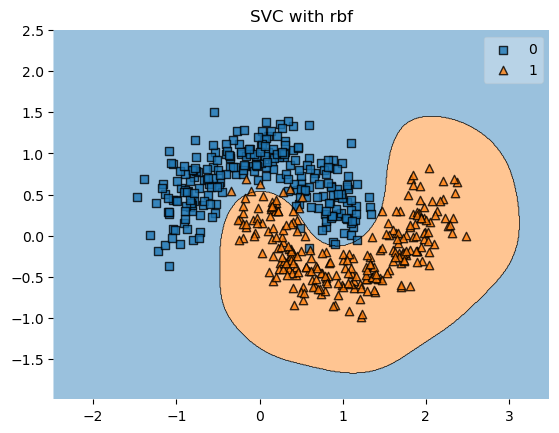

In [97]:
svm = SVC(kernel='rbf', **best_param)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f'f1 score: {f1:.3f}')
plot_decisions(moons_points, moons_labels, svm, 'SVC with rbf')

### Sigmoid

In [115]:
param_grid = {'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
             'C': [1, 5, 10, 20, 30, 40, 50],
             }

svm = SVC(kernel='sigmoid')
grid_search = GridSearchCV(svm, param_grid, n_jobs=8)
grid_search.fit(X_train, y_train)
best_param = grid_search.best_params_
best_param

{'C': 20, 'gamma': 0.01}

f1 score: 0.857


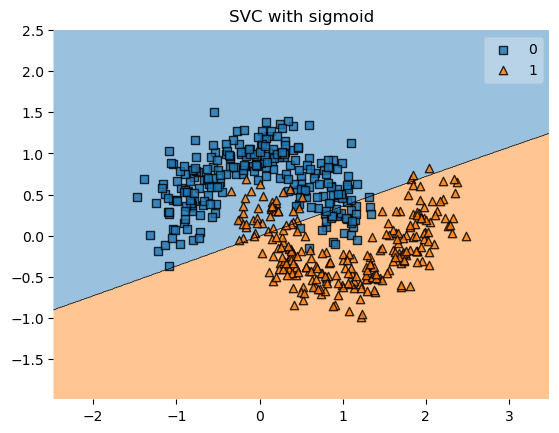

In [116]:
svm = SVC(kernel='sigmoid', **best_param)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f'f1 score: {f1:.3f}')
plot_decisions(moons_points, moons_labels, svm, 'SVC with sigmoid')

При использовании полиномиального ядра точность классификации по сравнению с линейным ядром возросла. Граница, разделяющая классы, теперь изогнутая, что позовляет лучше раделять классы. С помощью кросс-валидации на сетке была найденная лучшая степень ядра: degree = 3.

При использовании rbf ядра точность классификации по сравнению с линейным и полиномиальным ядрами возросла. Граница, разделяющая классы визуально достаточно точно раделяет классы.

Использование ядра sigmoid не дало прироста точности классификации. Граница, разделяющая классы, осталась визуально близка к линейной.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [70]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [117]:
estimators = [
        ('pf', PolynomialFeatures()),
        ('cl', LogisticRegression())
]

gs_pf_pipe = Pipeline(estimators)

param_grid = {'pf__degree': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

grid_search = GridSearchCV(gs_pf_pipe, param_grid, n_jobs=8)
grid_search.fit(X_train, y_train)
best_param = grid_search.best_params_
best_param

{'pf__degree': 7}

f1 score: 0.964


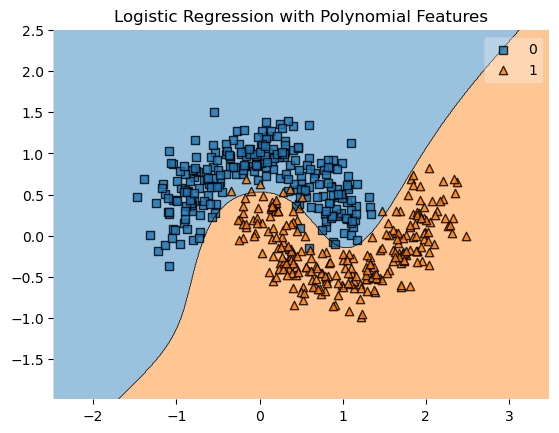

In [118]:
estimators = [
        ('pf', PolynomialFeatures(degree = 7)),
        ('cl', LogisticRegression())
]

pf_pipe = Pipeline(estimators)
pf_pipe.fit(X_train, y_train)
y_pred = pf_pipe.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f'f1 score: {f1:.3f}')
plot_decisions(moons_points, moons_labels, pf_pipe, 'Logistic Regression with Polynomial Features')

По качеству классификации данная модель близка к лучшей модели на основе SVC - ядру RBF. Граница достаточно хорошо разделяет классы.

С помощью кросс-валидации на сетке было установлено, что данная модель обеспечивает наилучшую точность с degree = 7. Для SVC с ядром poly оптимальный параметр degree = 3, однако эти параметры имеею разный смысл у данных алгоритмов, поэтому их сравнение некорректно.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

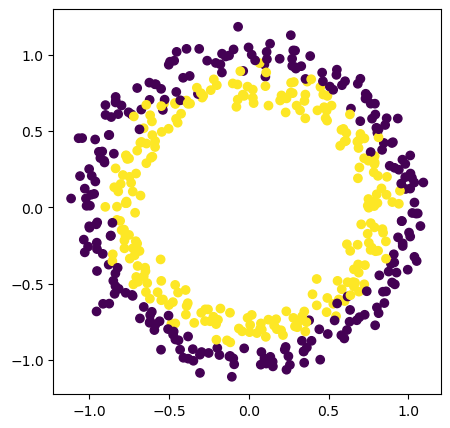

In [73]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

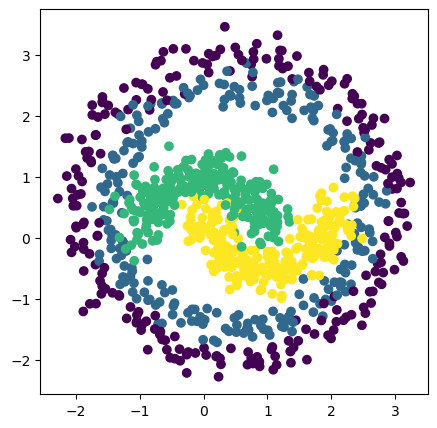

In [74]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

In [121]:
X_train, X_test, y_train, y_test = train_test_split(points, labels, test_size=0.2, random_state=42)

### Logistic Regression with Polynomial Features

In [122]:
estimators = [
        ('pf', PolynomialFeatures()),
        ('cl', LogisticRegression(multi_class='multinomial', solver='saga',
                                  tol = 1e-3, max_iter=1000))
]

gs_pf_pipe = Pipeline(estimators)

param_grid = {'pf__degree': [2, 3, 4, 5, 6, 7, 8, 9, 10],
              'cl__C': [1, 5, 10],
              'cl__penalty': ['l1', 'l2'],
}

grid_search = GridSearchCV(gs_pf_pipe, param_grid, n_jobs=8)
grid_search.fit(X_train, y_train)
best_param = grid_search.best_params_
best_param

{'cl__C': 5, 'cl__penalty': 'l1', 'pf__degree': 3}

f1 score: 0.875


C:\Users\OlegKashurin\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


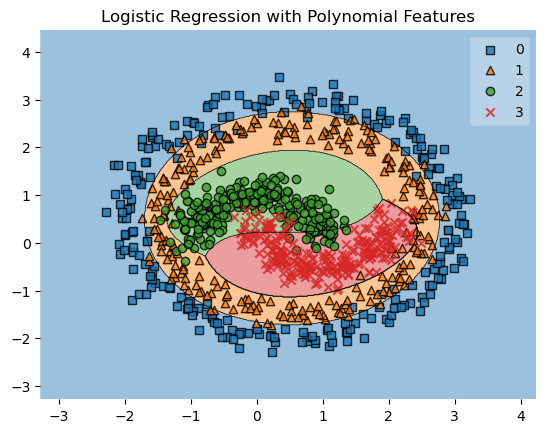

In [123]:
estimators = [
        ('pf', PolynomialFeatures(degree = 3)),
        ('cl', LogisticRegression(multi_class='multinomial', solver='saga',
                                  tol = 1e-3, max_iter=1000,
                                  C = 5, penalty = 'l1'))
]

pf_pipe = Pipeline(estimators)
pf_pipe.fit(X_train, y_train)
y_pred = pf_pipe.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'f1 score: {f1:.3f}')
plot_decisions(points, labels, pf_pipe, 'Logistic Regression with Polynomial Features')

### SVC with RBF kernel

In [124]:
param_grid = {'gamma': [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100],
              'C': [0.01, 0.1, 1, 10, 100],
             }

svm = SVC(kernel='rbf')
grid_search = GridSearchCV(svm, param_grid, n_jobs=8)
grid_search.fit(X_train, y_train)
best_param = grid_search.best_params_
best_param

{'C': 1, 'gamma': 1}

f1 score: 0.945


C:\Users\OlegKashurin\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


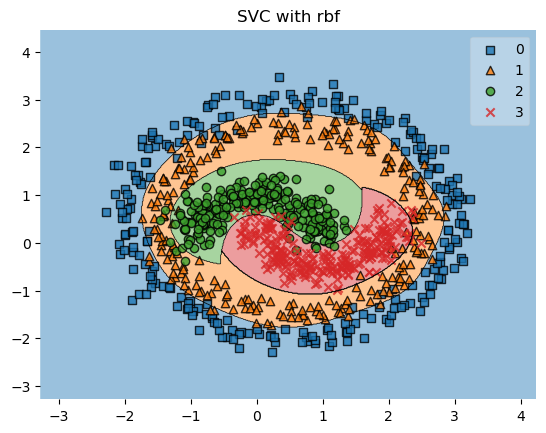

In [125]:
svm = SVC(kernel='rbf', **best_param)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'f1 score: {f1:.3f}')
plot_decisions(points, labels, svm, 'SVC with rbf')

Визульно обе модели достаточно неплохо разделяют классы. При этом заметно, что SVC с ядром RBF делает это все же лучше, поэтому закономерно, что f1 score на тестовых данных для нее выше и составляет 0.95.